In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from collections import Counter

# Exploratory Data Analyses - EDA - partner_i oficial data

In [2]:
xls = pd.ExcelFile(
    "../../../data/raw/partner_i-Oficial/DB_Master_CP1_latest v03.06.xlsx", engine="openpyxl"
)

In [3]:
xls.sheet_names

['DB0 Forno',
 'Base',
 'DB1 Combustíveis',
 'Sheet8',
 'DB2 Clínquer',
 'Base auxiliar',
 'DB3 Cimento Production',
 'DB3 Cimento Shipping',
 'Sheet2']

In [4]:
df = pd.read_excel(xls, "DB2 Clínquer", header=[1, 2])

In [5]:
df

Unnamed: 0_level_0        Date       Time        Date  \
                        Unnamed: 0_level_1  Production Production Measurement   
0                          Unit of measure  dd/mm/yyyy   hh:mm:ss  dd/mm/yyyy   
1     Frequency of data collection per day         NaN        NaN         NaN   
2                            Sl No. Method         NaN        NaN         NaN   
3                                        1  11/01/2020      15:00  11/01/2020   
4                                        2  11/01/2020      17:00  11/01/2020   
...                                    ...         ...        ...         ...   
5153                                  5151  03/05/2022      05:00  03/05/2022   
5154                                  5152  03/05/2022      09:00  03/05/2022   
5155                                  5153  03/05/2022      13:00  03/05/2022   
5156                                  5154  03/05/2022      17:00  03/05/2022   
5157                                  5155  03/05/2022      21:00  03/05/2022   

            Time Feed raw meal                                      ...  \
     Measurement           CaO      SO3      K2O      MgO     Na2O  ...   
0       hh:mm:ss             %        %        %        %        %  ...   
1            NaN             8        8        8        8        8  ...   
2            NaN           XRF      XRF      XRF      XRF      XRF  ...   
3          15:00       42.4677  0.38858  0.86882  2.25902  0.17225  ...   
4          17:00       42.1837  0.36703  0.86713  2.27476  0.16453  ...   
...          ...           ...      ...      ...      ...      ...  ...   
5153       05:00       41.3111  0.43643  0.93827  2.65813  0.17015  ...   
5154       09:00       41.6268  0.38797  0.85818   2.7311  0.16598  ...   
5155       13:00         41.04  0.36535  0.89819  2.75717  0.16215  ...   
5156       17:00       41.1934  0.38234  0.87815  2.92591  0.16756  ...   
5157       21:00       41.2743  0.38831  0.87637  2.99666  0.17139  ...   

     Composition                                                          \
              AR Liquid phase 1338 Liquid phase 1450 Sulphur alkali rate   
0            NaN               NaN               NaN                 NaN   
1              8                 8                 8                   8   
2            XRF               XRF               XRF                 XRF   
3         1.6586            23.413            26.688              1.5129   
4         1.5867           23.1577           25.8756              1.3012   
...          ...               ...               ...                 ...   
5153      1.4204           25.1251           26.4679              1.2916   
5154      1.4484           25.1058           26.6975              1.3802   
5155      1.4251           25.4169           26.8258              1.2008   
5156         NaN               NaN               NaN                 NaN   
5157      1.4382           25.5774           27.1242              1.2762   

                                                                  
     Free lime Free lime.1 Ferrite Periclase Portlandite Remarks  
0            %           %       %         %           %     NaN  
1            7           8       8         8           8     0.0  
2          XRF         XRD     XRD       XRD         XRD     NaN  
3         6.18        6.39    6.73       2.5        0.17     NaN  
4          8.5        8.84    6.77      2.44        0.55     NaN  
...        ...         ...     ...       ...         ...     ...  
5153       3.1         NaN     NaN       NaN         NaN     NaN  
5154      4.55        4.55    9.66      3.63        0.02     NaN  
5155      3.48        3.48    9.02      3.38        0.25     NaN  
5156       NaN         NaN     NaN       NaN         NaN     NaN  
5157      2.36        2.36    9.27      3.39        0.31     NaN  

[5158 rows x 86 columns]

In [6]:
df["Composition"]

,C3S M1,C3S M3,C3S Tot.,C2S,C3A cubic,C3A ortho,C4AF,CaO,MgO,Gypsum,...,AR,Liquid phase 1338,Liquid phase 1450,Sulphur alkali rate,Free lime,Free lime.1,Ferrite,Periclase,Portlandite,Remarks
0,%,%,%,%,%,%,%,%,%,%,...,NaN,NaN,NaN,NaN,%,%,%,%,%,NaN
1,8,8,8,8,8,8,8,8,8,0,...,8,8,8,8,7,8,8,8,8,0.0
2,XRD,XRD,XRD,XRD,XRD,XRD,XRD,XRF,XRF,XRD,...,XRF,XRF,XRF,XRF,XRF,XRD,XRD,XRD,XRD,NaN
3,27.76,33.3,61.06,15.56,4.84,1.19,8.8529,64.5172,3.5333,NaN,...,1.6586,23.413,26.688,1.5129,6.18,6.39,6.73,2.5,0.17,NaN
4,23.03,37.49,60.52,13.58,4.84,1.2,9.0887,65.9312,3.6719,NaN,...,1.5867,23.1577,25.8756,1.3012,8.5,8.84,6.77,2.44,0.55,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5153,NaN,NaN,NaN,NaN,NaN,NaN,9.9352,63.5407,4.3023,NaN,...,1.4204,25.1251,26.4679,1.2916,3.1,NaN,NaN,NaN,NaN,NaN
5154,51.46,12.45,63.91,12.18,3.88,0.45,9.7816,63.0703,4.2037,NaN,...,1.4484,25.1058,26.6975,1.3802,4.55,4.55,9.66,3.63,0.02,NaN
5155,46.05,17.37,66.41,13.8,3.44,1.07,10.0838,62.4816,4.2344,NaN,...,1.4251,25.4169,26.8258,1.2008,3.48,3.48,9.02,3.38,0.25,NaN
5156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df["Date"]

,Production,Measurement
0,dd/mm/yyyy,dd/mm/yyyy
1,NaN,NaN
2,NaN,NaN
3,11/01/2020,11/01/2020
4,11/01/2020,11/01/2020
...,...,...
5153,03/05/2022,03/05/2022
5154,03/05/2022,03/05/2022
5155,03/05/2022,03/05/2022
5156,03/05/2022,03/05/2022


In [8]:
df["Time"]

,Production,Measurement
0,hh:mm:ss,hh:mm:ss
1,NaN,NaN
2,NaN,NaN
3,15:00,15:00
4,17:00,17:00
...,...,...
5153,05:00,05:00
5154,09:00,09:00
5155,13:00,13:00
5156,17:00,17:00


In [9]:
df = pd.concat([df["Date"], df["Time"], df["Composition"]], axis=1)

In [10]:
df = df.drop([0,1,2], axis=0).reset_index(drop=True)

In [11]:
df = pd.concat([
    df["Production"].iloc[:, 0],
    df["Measurement"].iloc[:, 0],
    df["Production"].iloc[:, 1].rename("Production.1"),
    df["Measurement"].iloc[:, 1].rename("Measurement.1"),
    df.drop(["Production", "Measurement"], axis=1)
], axis=1)

In [12]:
df = df.infer_objects()

In [13]:
# df.to_csv("../../../data/interim/partner_i-Oficial/cement-shipping.csv", index=False)
# df = pd.read_csv("../../../data/interim/partner_i-Oficial/cement-shipping.csv")

## EDA

In [14]:
df.shape

(5155, 42)

In [15]:
df.head()

,Production,Measurement,Production.1,Measurement.1,C3S M1,C3S M3,C3S Tot.,C2S,C3A cubic,C3A ortho,...,AR,Liquid phase 1338,Liquid phase 1450,Sulphur alkali rate,Free lime,Free lime.1,Ferrite,Periclase,Portlandite,Remarks
0,11/01/2020,11/01/2020,15:00,15:00,27.76,33.30,61.06,15.56,4.84,1.19,...,1.6586,23.4130,26.6880,1.5129,6.18,6.39,6.73,2.50,0.17,NaN
1,11/01/2020,11/01/2020,17:00,17:00,23.03,37.49,60.52,13.58,4.84,1.20,...,1.5867,23.1577,25.8756,1.3012,8.50,8.84,6.77,2.44,0.55,NaN
2,11/01/2020,11/01/2020,19:00,19:00,8.38,57.31,65.69,12.48,4.96,1.41,...,1.5735,23.4163,26.0793,1.1448,3.47,3.84,7.20,2.62,0.24,NaN
3,11/01/2020,11/01/2020,21:00,21:00,14.80,51.40,66.20,12.19,5.15,1.29,...,NaN,NaN,NaN,NaN,NaN,3.61,7.34,2.54,0.32,NaN
4,11/01/2020,11/01/2020,23:00,23:00,6.14,52.55,58.68,17.71,4.30,1.15,...,1.5453,24.2932,26.6989,1.5390,5.37,6.19,7.11,2.64,0.54,NaN


In [16]:
df.tail()

,Production,Measurement,Production.1,Measurement.1,C3S M1,C3S M3,C3S Tot.,C2S,C3A cubic,C3A ortho,...,AR,Liquid phase 1338,Liquid phase 1450,Sulphur alkali rate,Free lime,Free lime.1,Ferrite,Periclase,Portlandite,Remarks
5150,03/05/2022,03/05/2022,05:00,05:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1.4204,25.1251,26.4679,1.2916,3.10,NaN,NaN,NaN,NaN,NaN
5151,03/05/2022,03/05/2022,09:00,09:00,51.46,12.45,63.91,12.18,3.88,0.45,...,1.4484,25.1058,26.6975,1.3802,4.55,4.55,9.66,3.63,0.02,NaN
5152,03/05/2022,03/05/2022,13:00,13:00,46.05,17.37,66.41,13.80,3.44,1.07,...,1.4251,25.4169,26.8258,1.2008,3.48,3.48,9.02,3.38,0.25,NaN
5153,03/05/2022,03/05/2022,17:00,17:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5154,03/05/2022,03/05/2022,21:00,21:00,52.83,14.98,67.80,10.40,3.90,0.73,...,1.4382,25.5774,27.1242,1.2762,2.36,2.36,9.27,3.39,0.31,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5155 entries, 0 to 5154
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Production           5155 non-null   object 
 1   Measurement          5155 non-null   object 
 2   Production.1         5155 non-null   object 
 3   Measurement.1        5155 non-null   object 
 4   C3S M1               4623 non-null   float64
 5   C3S M3               4623 non-null   float64
 6   C3S Tot.             4624 non-null   float64
 7   C2S                  4624 non-null   float64
 8   C3A cubic            4625 non-null   float64
 9   C3A ortho            4625 non-null   float64
 10  C4AF                 4724 non-null   float64
 11  CaO                  4792 non-null   float64
 12  MgO                  4792 non-null   float64
 13  Gypsum               0 non-null      float64
 14  Bassanite            0 non-null      float64
 15  Anhidrite            0 non-null      f

<h2>1. Structure Investigation</h2>

In [18]:
df.dtypes.value_counts()

float64    38
object      4
dtype: int64

<h3>1.1 Structure of numerical features</h3>

In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
C3S M1,4623.0,31.298942,14.530275,0.0000,19.340000,30.96000,44.290000,131.5300
C3S M3,4623.0,36.918990,13.895261,6.9600,24.640000,36.86000,48.125000,73.9600
C3S Tot.,4624.0,68.220701,4.607647,25.7400,66.250000,69.12000,71.310000,76.8100
C2S,4624.0,11.646116,4.058810,2.3800,8.880000,10.95500,13.710000,41.4100
C3A cubic,4625.0,3.493920,0.982587,0.0200,2.820000,3.43000,4.110000,8.0000
C3A ortho,4625.0,0.964119,0.477949,0.0100,0.620000,0.86000,1.290000,6.4500
C4AF,4724.0,10.379148,0.608913,8.2608,9.964075,10.33670,10.769125,12.6675
CaO,4792.0,63.981815,0.966235,56.7648,63.424850,63.98805,64.573325,67.6890
MgO,4792.0,3.193967,0.608295,1.7226,2.745225,3.16850,3.615800,5.0651
Gypsum,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>1.2 Structure of Non-Numeric features</h3>

In [20]:
df.describe(exclude='number').T

,count,unique,top,freq
Production,5155,643,21/04/2021,15
Measurement,5155,643,21/04/2021,15
Production.1,5155,26,05:00,534
Measurement.1,5155,26,05:00,534


In [21]:
df["Remarks"].unique()

array([nan])

In [22]:
dates = pd.to_datetime(
    (
        df["Production"].astype(str)
        + " "
        + df["Production.1"]
        .astype(str)
        .apply(lambda x: x + ":00" if len(x) <= 5 else x)
    ).str.strip(),
    format="%d/%m/%Y %H:%M:%S",
)

In [23]:
print(dates.min())
print(dates.max())

2020-01-11 15:00:00
2022-05-03 21:00:00


In [24]:
dates

0      2020-01-11 15:00:00
1      2020-01-11 17:00:00
2      2020-01-11 19:00:00
3      2020-01-11 21:00:00
4      2020-01-11 23:00:00
               ...        
5150   2022-05-03 05:00:00
5151   2022-05-03 09:00:00
5152   2022-05-03 13:00:00
5153   2022-05-03 17:00:00
5154   2022-05-03 21:00:00
Length: 5155, dtype: datetime64[ns]

In [25]:
df["Production"].unique().shape

(643,)

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<AxesSubplot:title={'center':'Unique Values per feature'}>

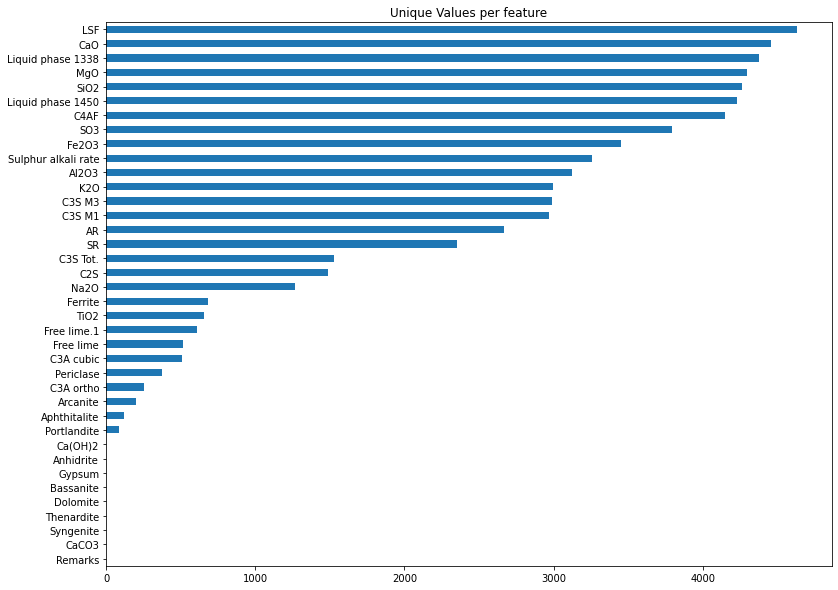

In [26]:
unique_values = df.select_dtypes(include='number').nunique().sort_values()

unique_values.plot.barh(logy=False, figsize=(13, 10), title='Unique Values per feature')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Production.1'),
  Text(1, 0, 'Measurement.1'),
  Text(2, 0, 'Production'),
  Text(3, 0, 'Measurement')])

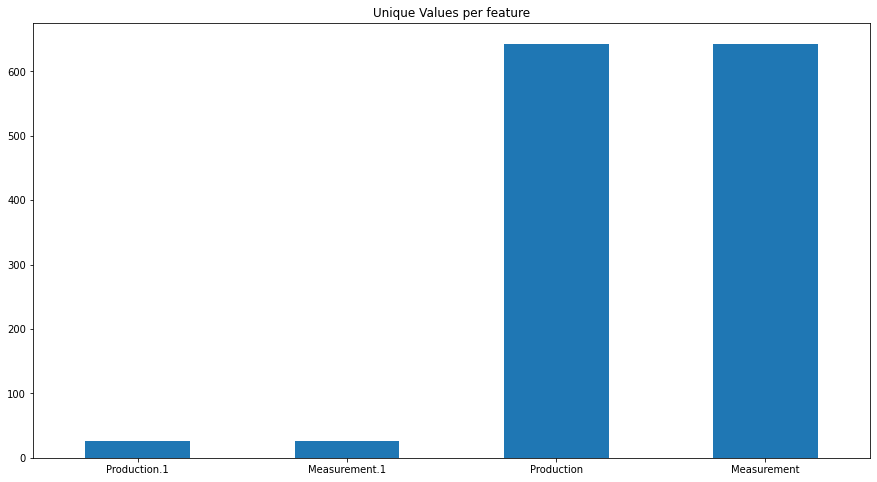

In [27]:
unique_values = df.select_dtypes(exclude='number').nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title='Unique Values per feature')

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [28]:
print("There are", df.isna().any().sum(), "variables with missing values from a total of", df.shape[1])

There are 38 variables with missing values from a total of 42


In [29]:
df.isna().any()

Production             False
Measurement            False
Production.1           False
Measurement.1          False
C3S M1                  True
C3S M3                  True
C3S Tot.                True
C2S                     True
C3A cubic               True
C3A ortho               True
C4AF                    True
CaO                     True
MgO                     True
Gypsum                  True
Bassanite               True
Anhidrite               True
Dolomite                True
Arcanite                True
Thenardite              True
Syngenite               True
Aphthitalite            True
Na2O                    True
Al2O3                   True
SiO2                    True
SO3                     True
K2O                     True
TiO2                    True
Fe2O3                   True
Ca(OH)2                 True
CaCO3                   True
LSF                     True
SR                      True
AR                      True
Liquid phase 1338       True
Liquid phase 1

In [30]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

,Missing (count)
Remarks,5155
Bassanite,5155
Thenardite,5155
Dolomite,5155
Ca(OH)2,5155
CaCO3,5155
Anhidrite,5155
Gypsum,5155
Syngenite,5155
Free lime,1724


In [31]:
print("There are a total of ", df.isna().sum().sum(), "missing values.")

There are a total of  60868 missing values.


/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of quantity of missing values')

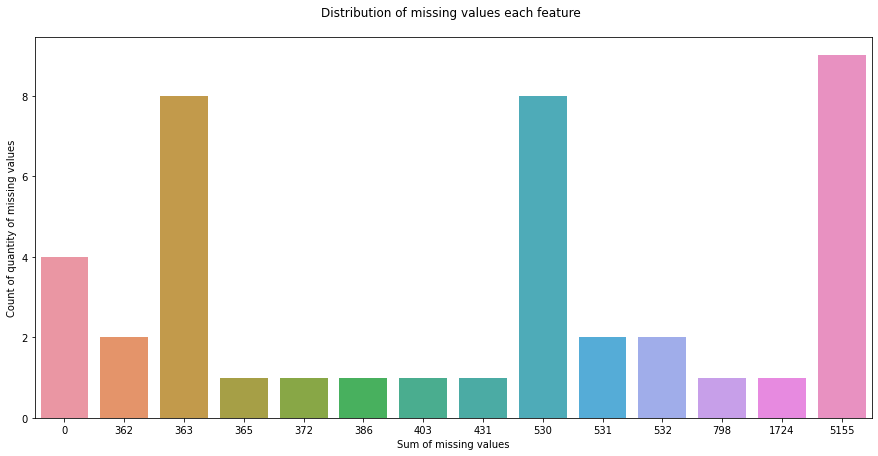

In [32]:
plt.figure(figsize=(15, 7))
sns.countplot(df.isna().sum())
plt.title("Distribution of missing values each feature \n")
plt.xlabel("Sum of missing values")
plt.ylabel("Count of quantity of missing values")

<BarContainer object of 42 artists>

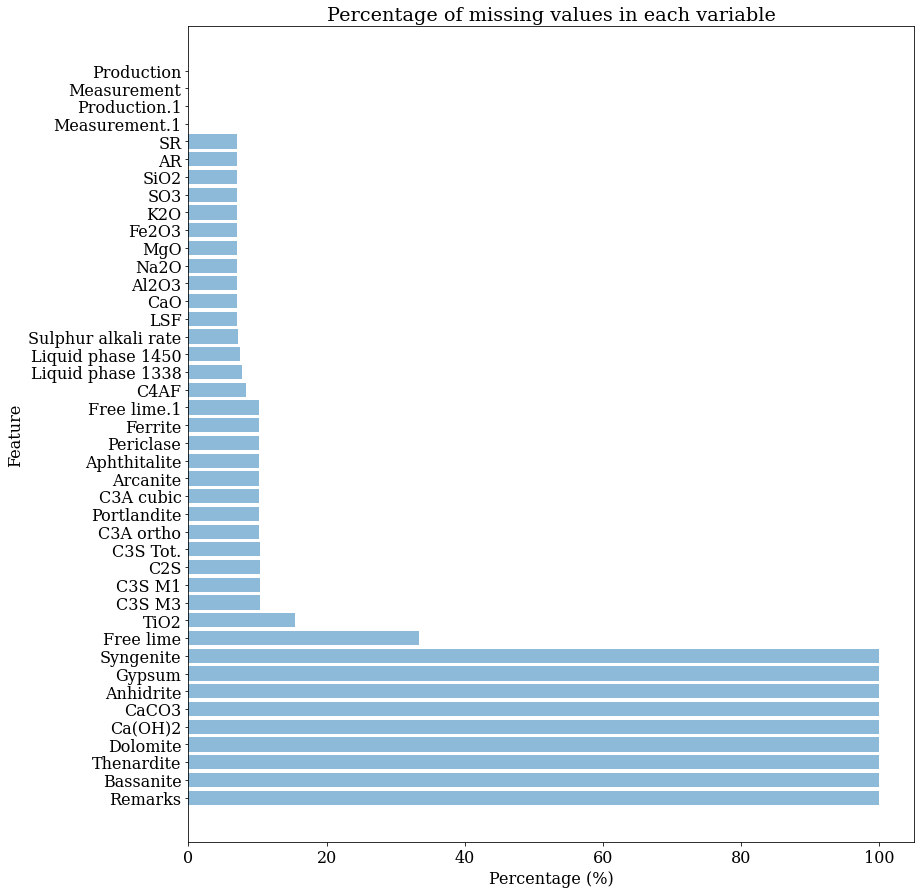

In [33]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [34]:
(df.isna().sum()/df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
Remarks,100.000000
Bassanite,100.000000
Thenardite,100.000000
Dolomite,100.000000
Ca(OH)2,100.000000
CaCO3,100.000000
Anhidrite,100.000000
Gypsum,100.000000
Syngenite,100.000000
Free lime,33.443259


<BarContainer object of 42 artists>

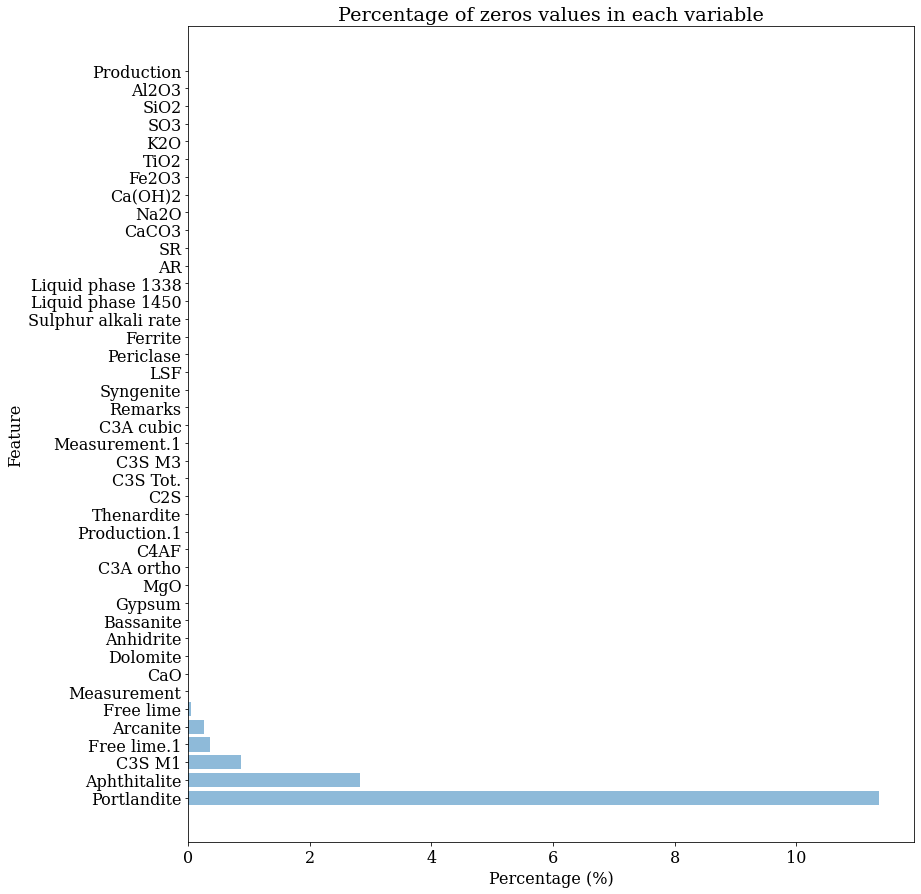

In [35]:
zeros_perc = (df == 0).sum(axis=0) / df.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of zeros values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

<h3>2.4. Duplicates</h3>

In [36]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 11 duplicates samples.


In [37]:
n_duplicates = (
    df.drop(["Production", "Measurement", "Production.1", "Measurement.1"], axis=1)
    .duplicated()
    .sum()
)
print(f"There are {n_duplicates} duplicates samples.")

There are 360 duplicates samples.


In [38]:
df

,Production,Measurement,Production.1,Measurement.1,C3S M1,C3S M3,C3S Tot.,C2S,C3A cubic,C3A ortho,...,AR,Liquid phase 1338,Liquid phase 1450,Sulphur alkali rate,Free lime,Free lime.1,Ferrite,Periclase,Portlandite,Remarks
0,11/01/2020,11/01/2020,15:00,15:00,27.76,33.30,61.06,15.56,4.84,1.19,...,1.6586,23.4130,26.6880,1.5129,6.18,6.39,6.73,2.50,0.17,NaN
1,11/01/2020,11/01/2020,17:00,17:00,23.03,37.49,60.52,13.58,4.84,1.20,...,1.5867,23.1577,25.8756,1.3012,8.50,8.84,6.77,2.44,0.55,NaN
2,11/01/2020,11/01/2020,19:00,19:00,8.38,57.31,65.69,12.48,4.96,1.41,...,1.5735,23.4163,26.0793,1.1448,3.47,3.84,7.20,2.62,0.24,NaN
3,11/01/2020,11/01/2020,21:00,21:00,14.80,51.40,66.20,12.19,5.15,1.29,...,NaN,NaN,NaN,NaN,NaN,3.61,7.34,2.54,0.32,NaN
4,11/01/2020,11/01/2020,23:00,23:00,6.14,52.55,58.68,17.71,4.30,1.15,...,1.5453,24.2932,26.6989,1.5390,5.37,6.19,7.11,2.64,0.54,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150,03/05/2022,03/05/2022,05:00,05:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1.4204,25.1251,26.4679,1.2916,3.10,NaN,NaN,NaN,NaN,NaN
5151,03/05/2022,03/05/2022,09:00,09:00,51.46,12.45,63.91,12.18,3.88,0.45,...,1.4484,25.1058,26.6975,1.3802,4.55,4.55,9.66,3.63,0.02,NaN
5152,03/05/2022,03/05/2022,13:00,13:00,46.05,17.37,66.41,13.80,3.44,1.07,...,1.4251,25.4169,26.8258,1.2008,3.48,3.48,9.02,3.38,0.25,NaN
5153,03/05/2022,03/05/2022,17:00,17:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

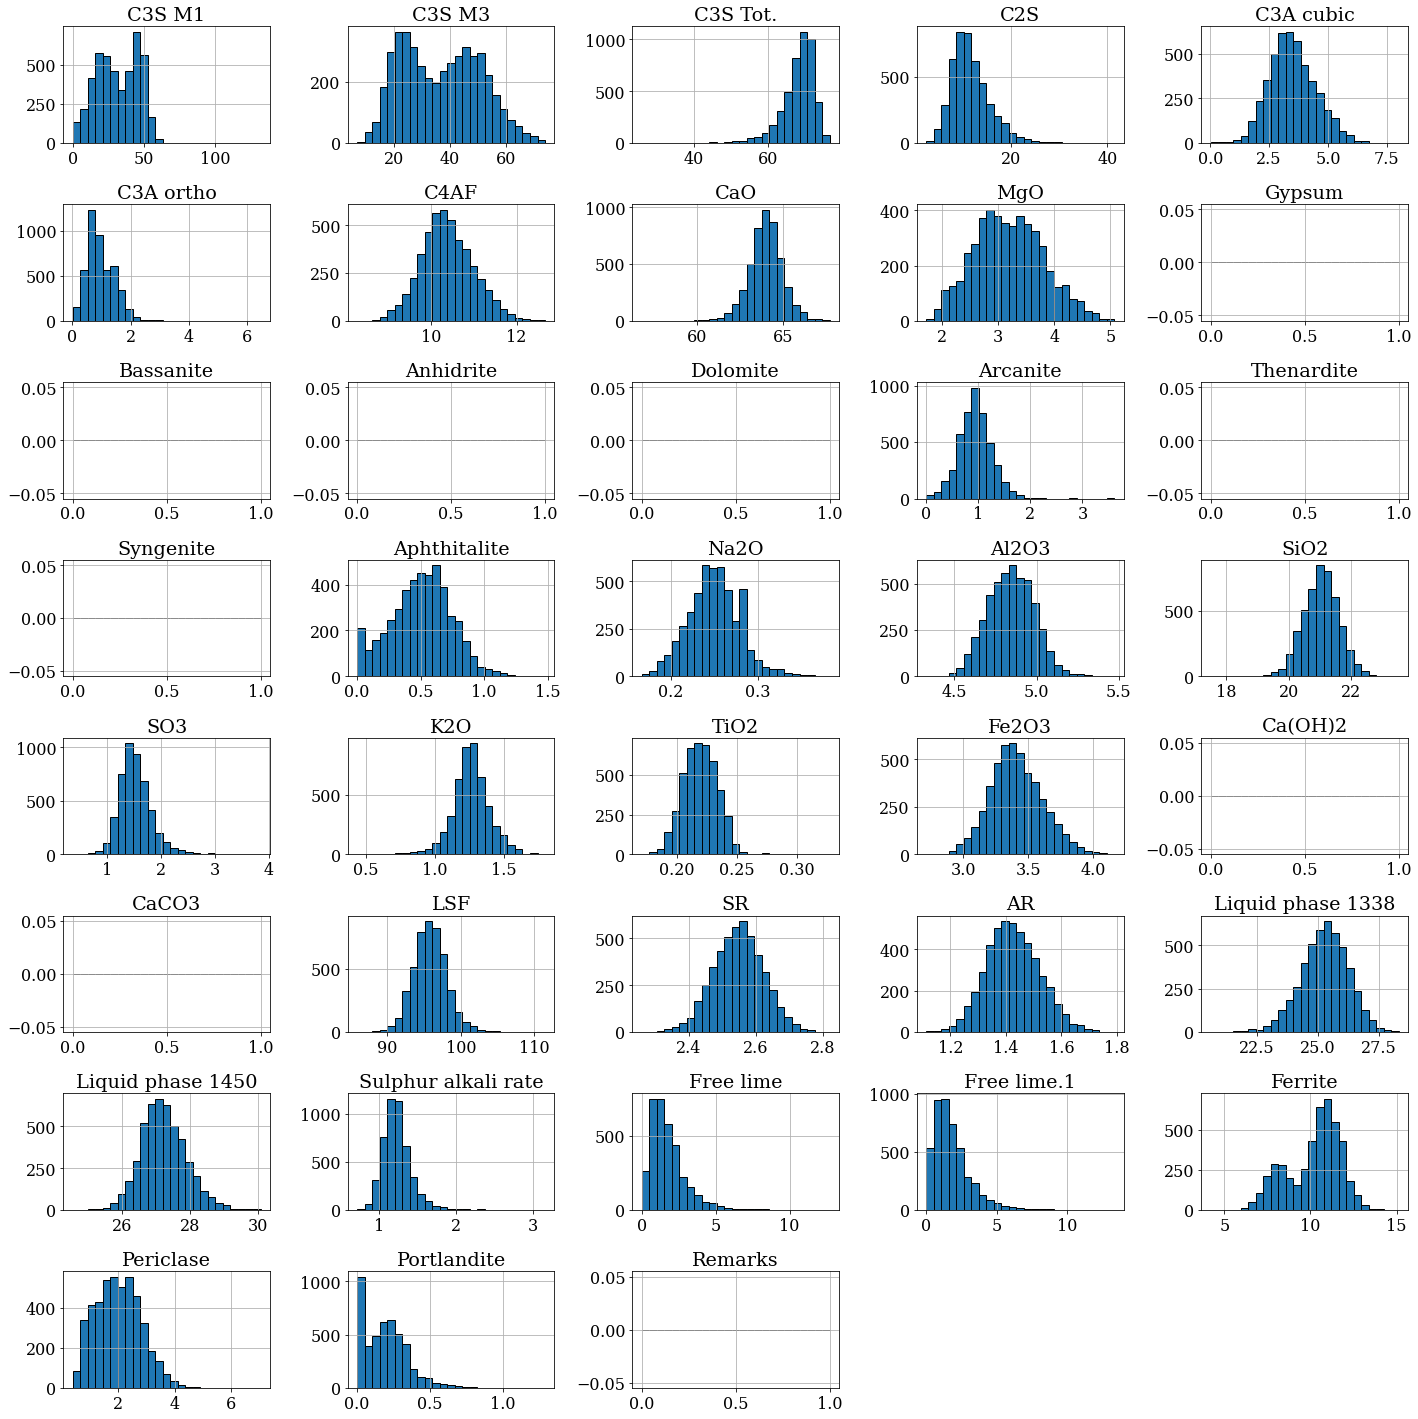

In [39]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

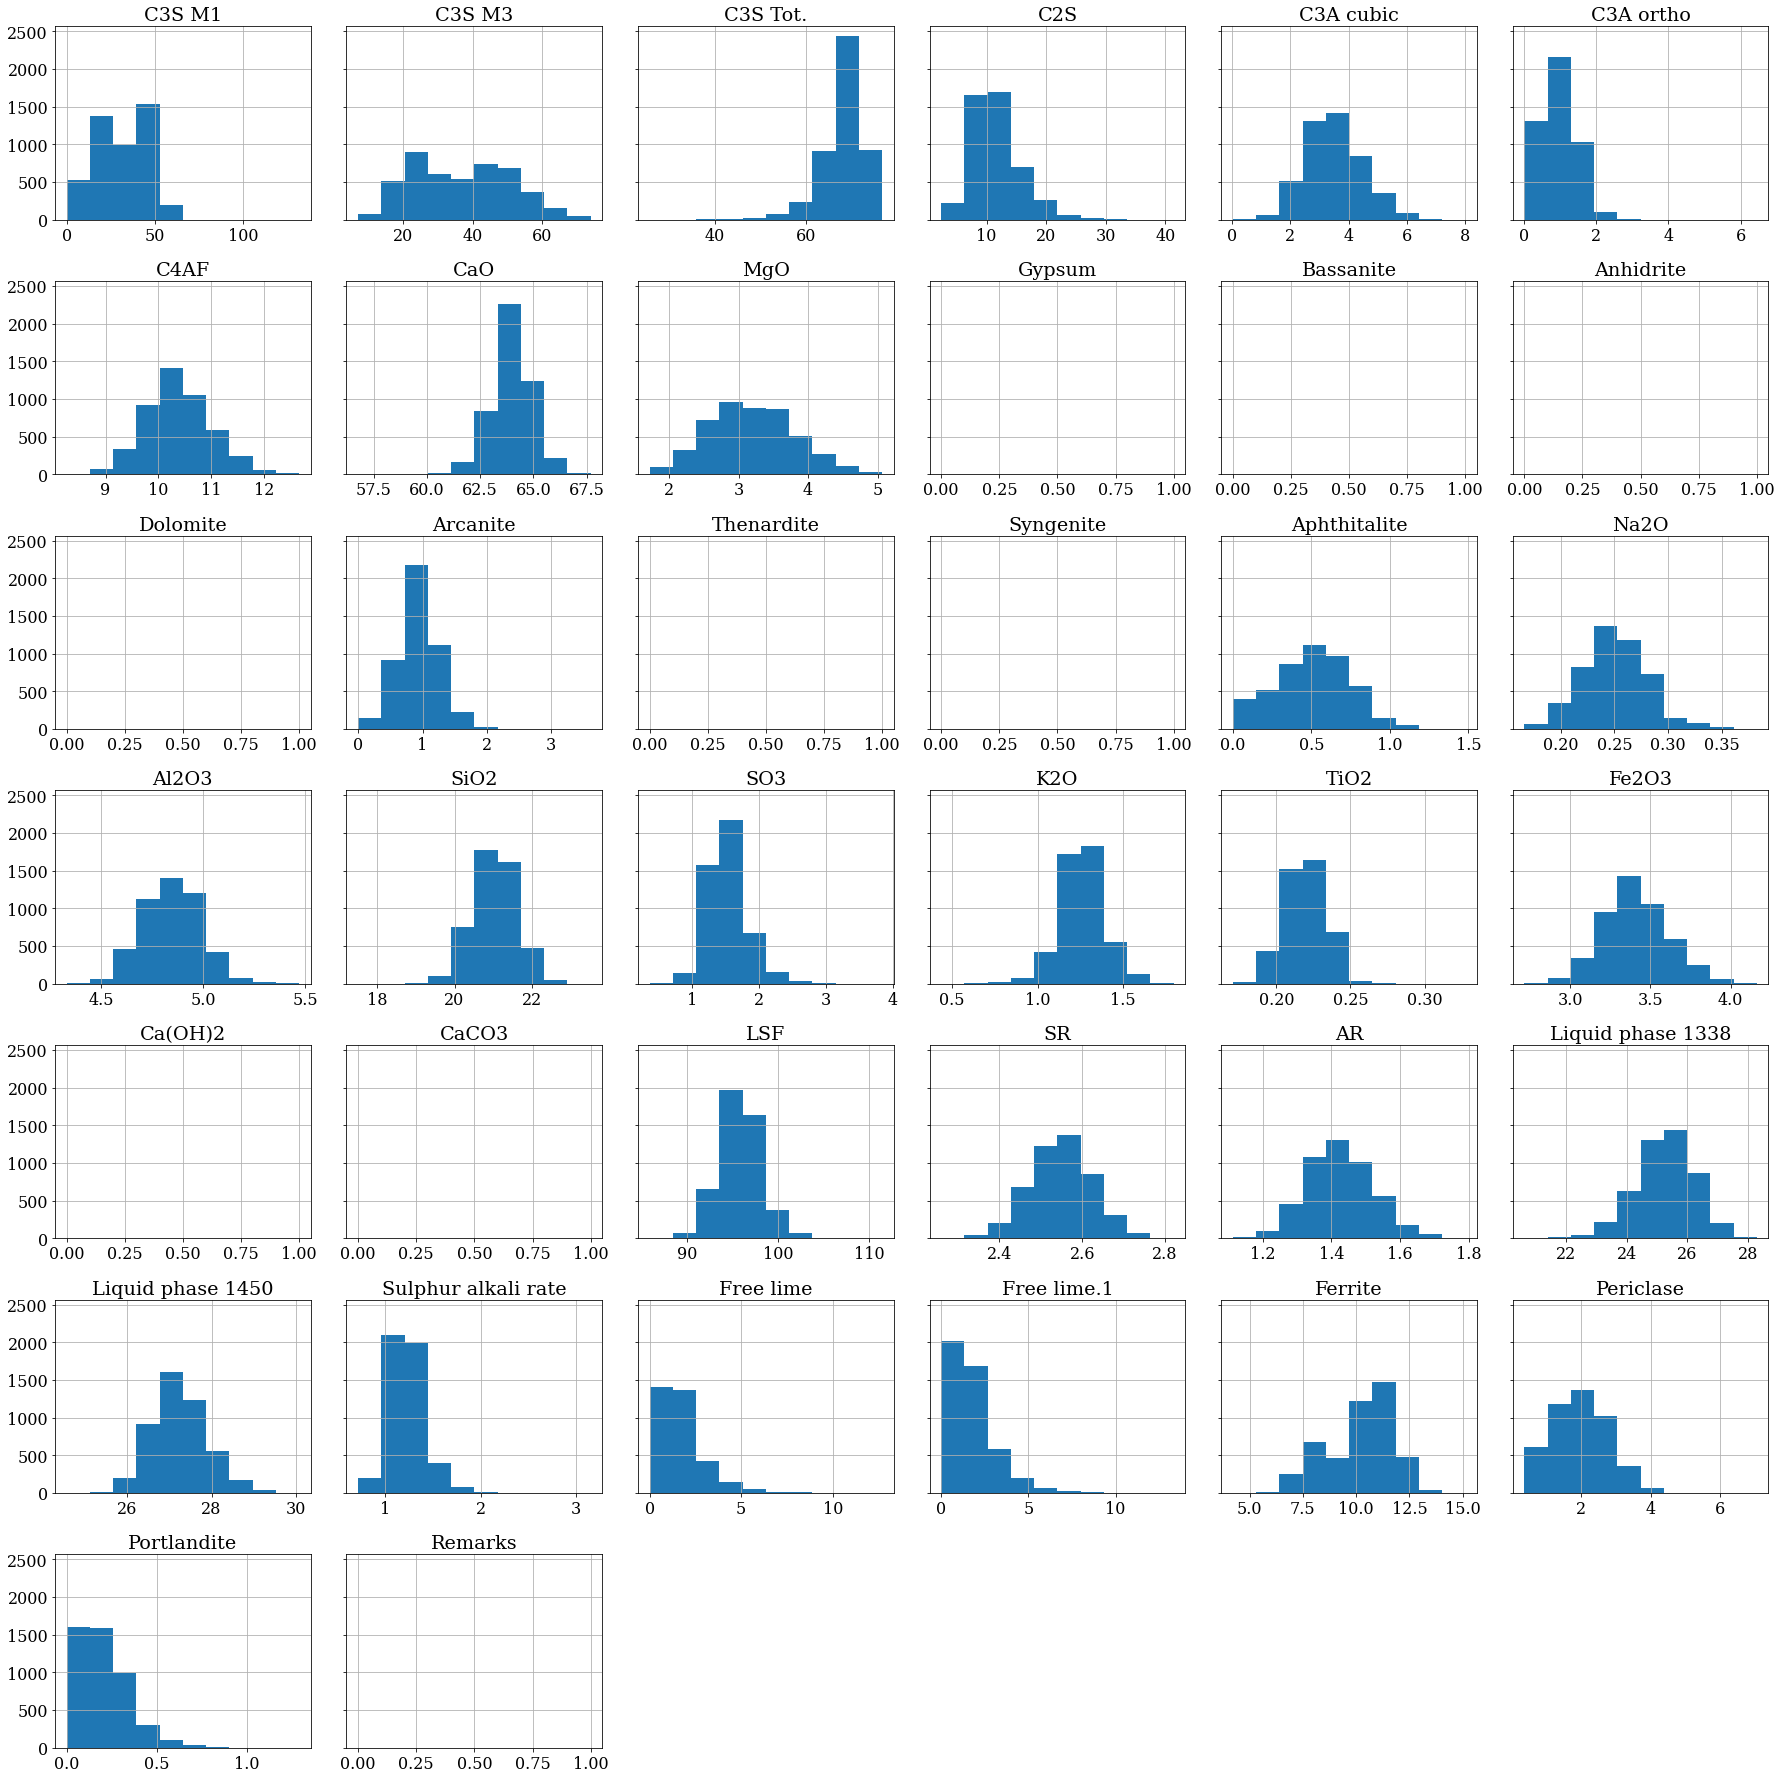

In [40]:
df.select_dtypes(include='float64').hist(figsize=(25, 25), sharey=True);
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

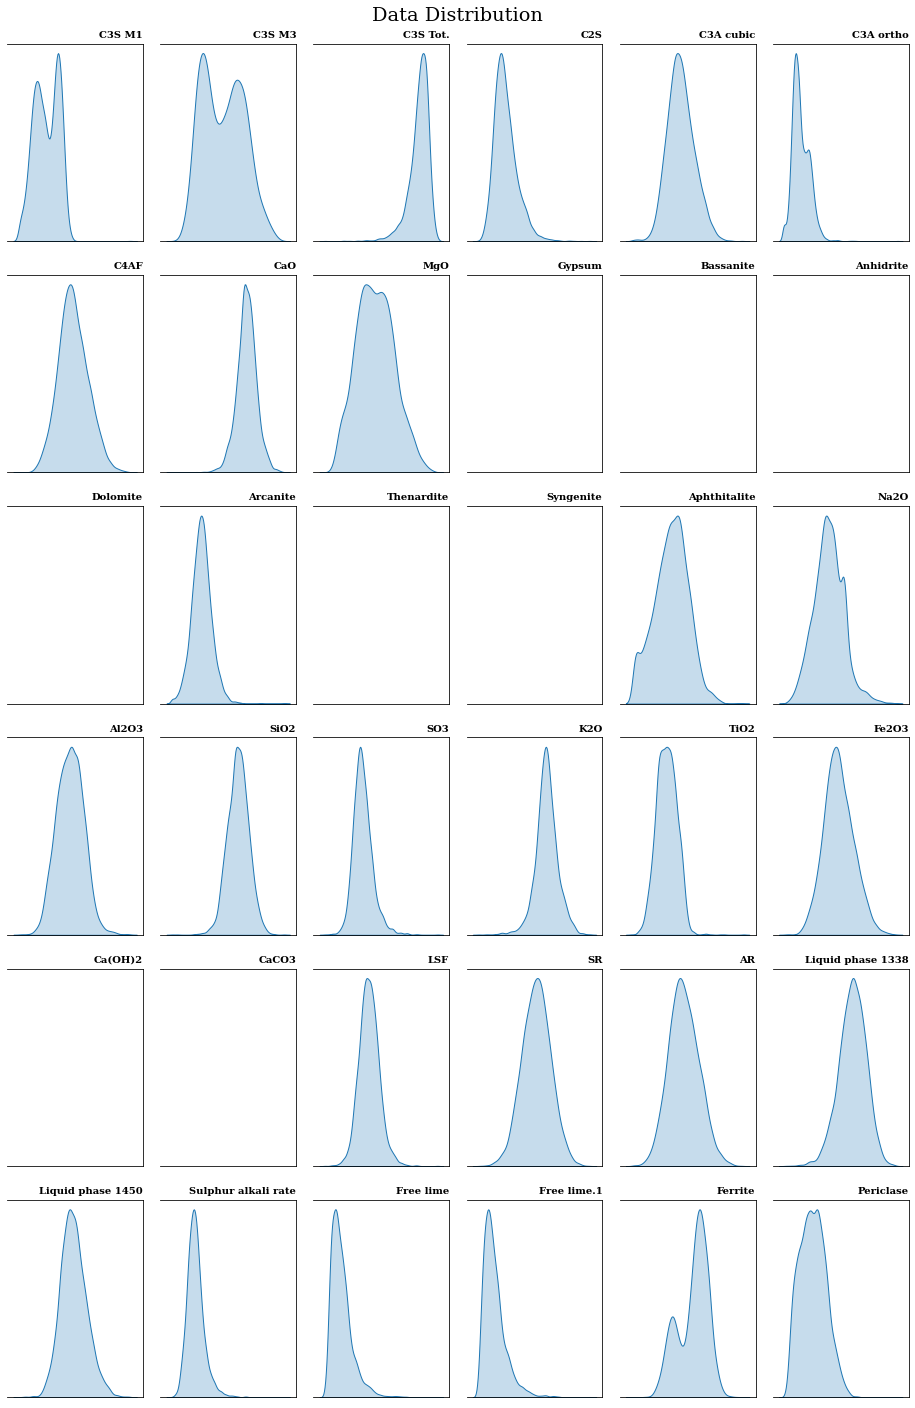

In [41]:
fig, axes = plt.subplots(6, 6, figsize=(13, 20))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

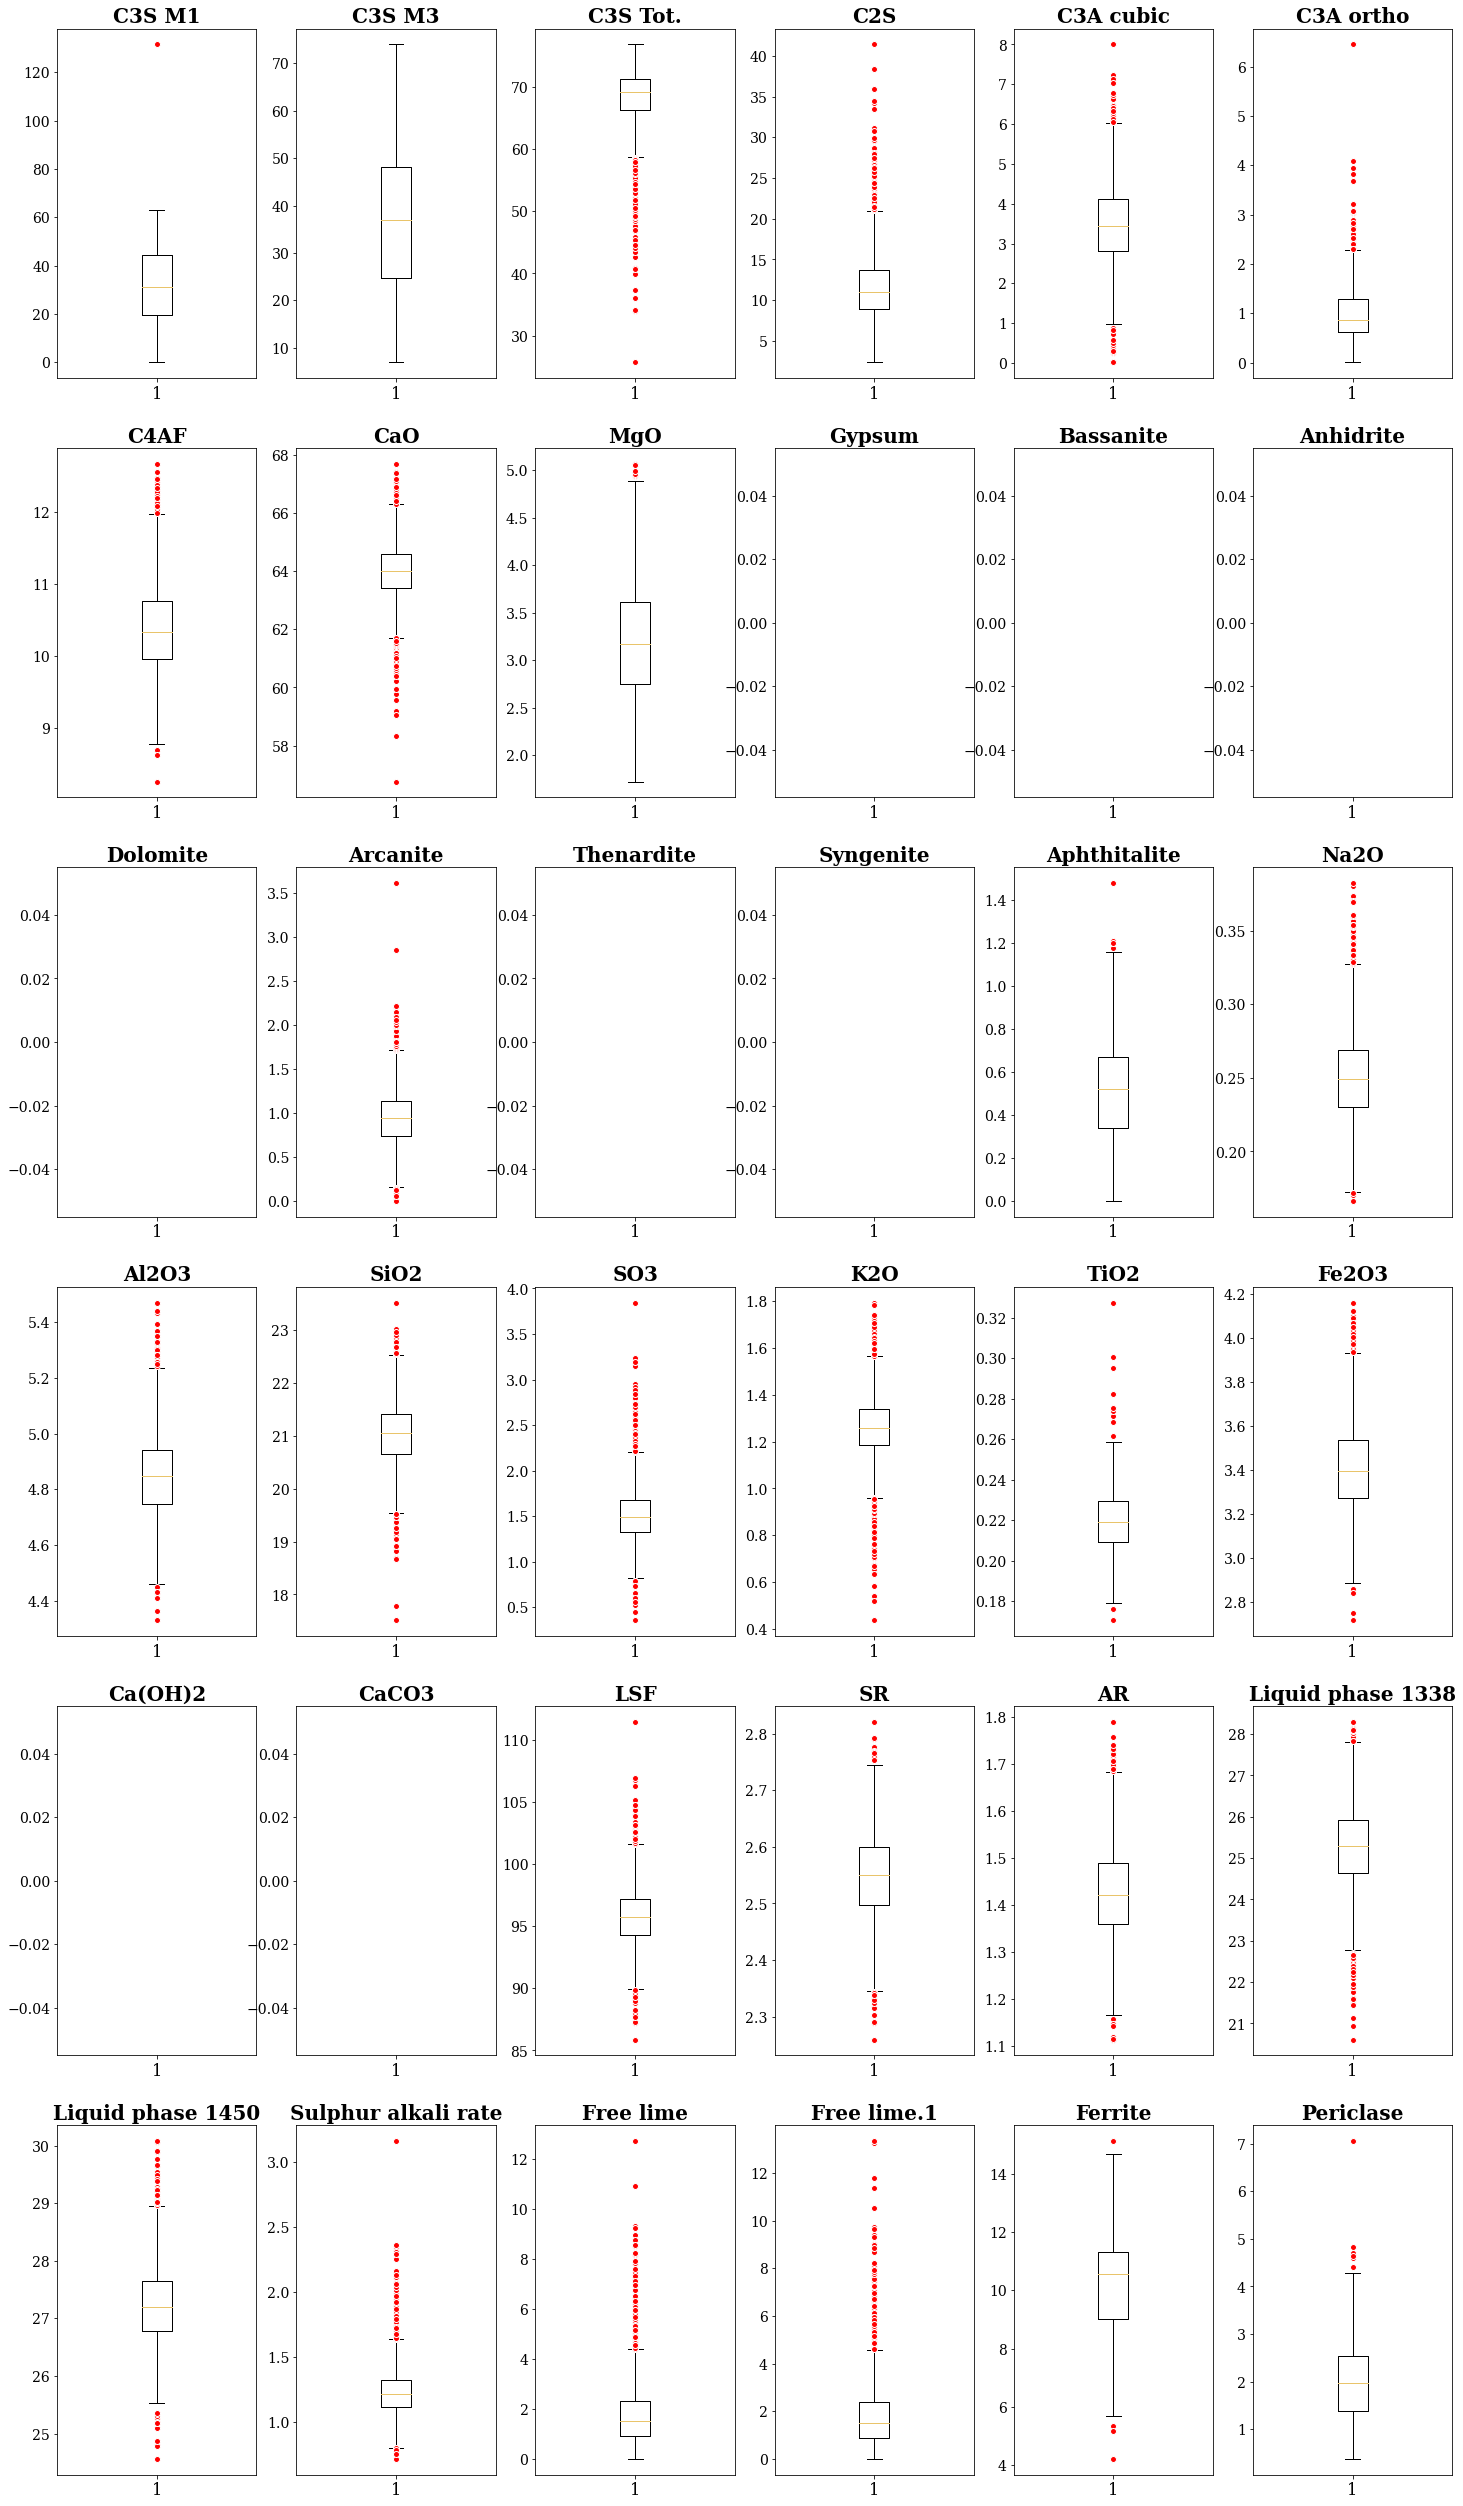

In [42]:
#Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include='float64').columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(6, 6, figsize=(25,45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:,i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

<h3>3.3. Feature Relationship</h3>

<AxesSubplot:>

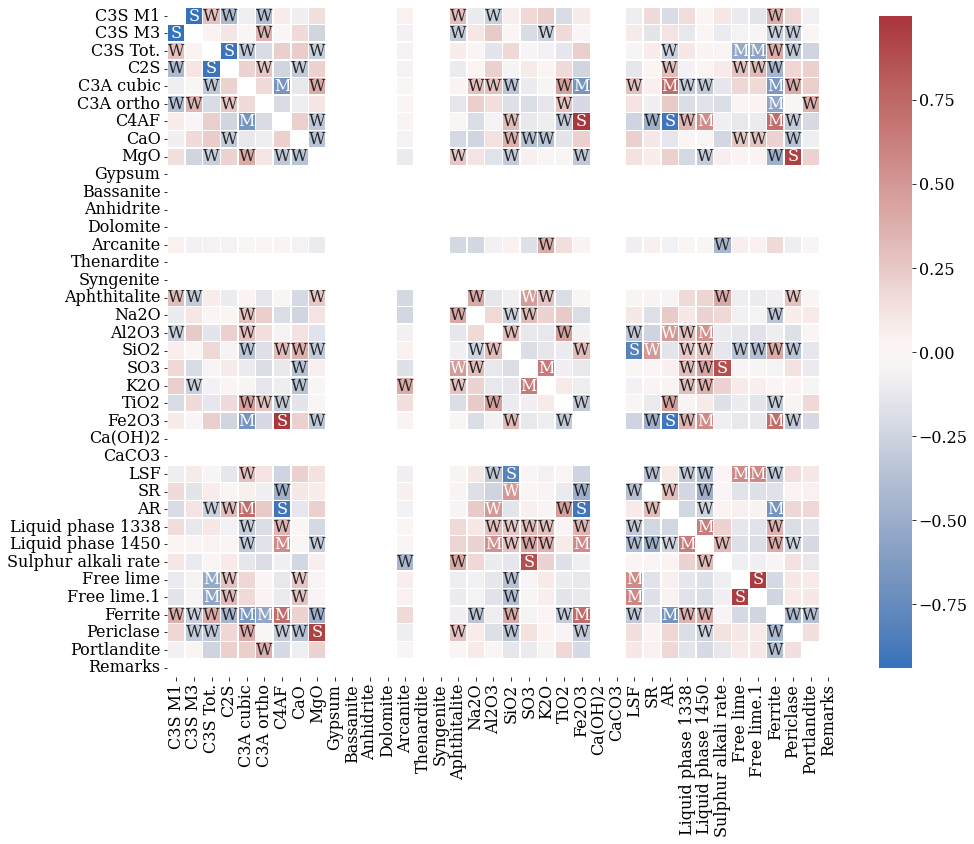

In [43]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(
    np.abs(df_corr) >= 0.75,
    "S",
    np.where(np.abs(df_corr) > 0.5, "M", np.where(np.abs(df_corr) > 0.25, "W", "")),
)

# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

<AxesSubplot:>

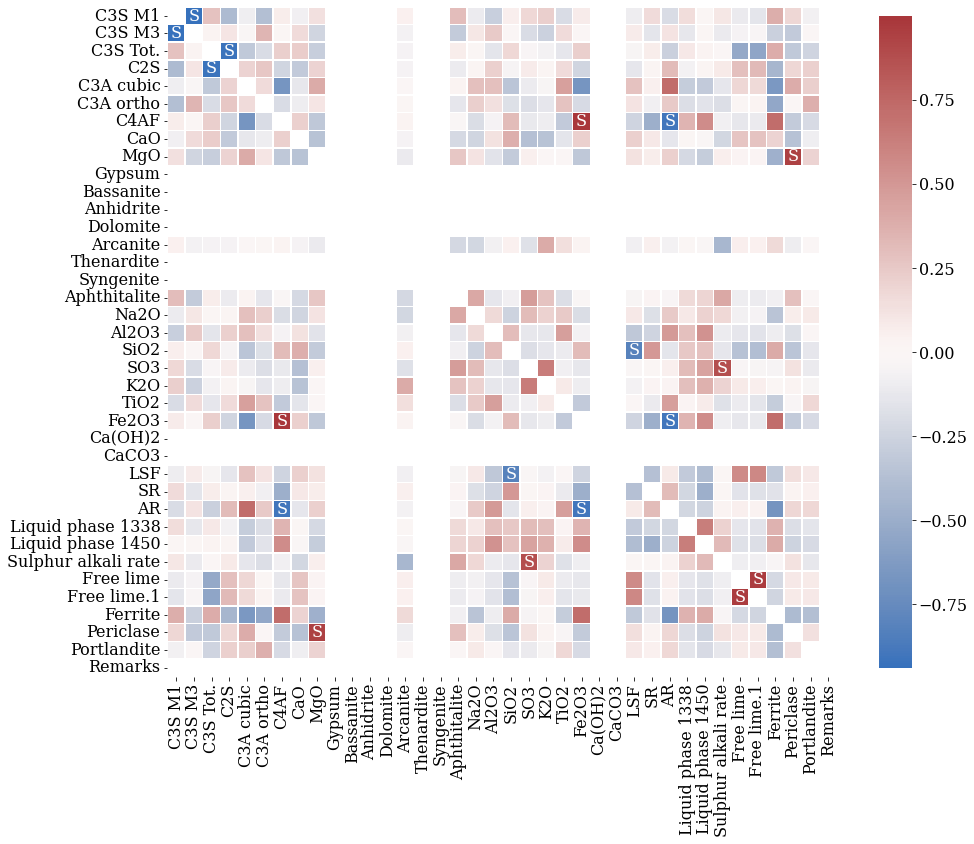

In [44]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr) >= 0.75, "S", "")


# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

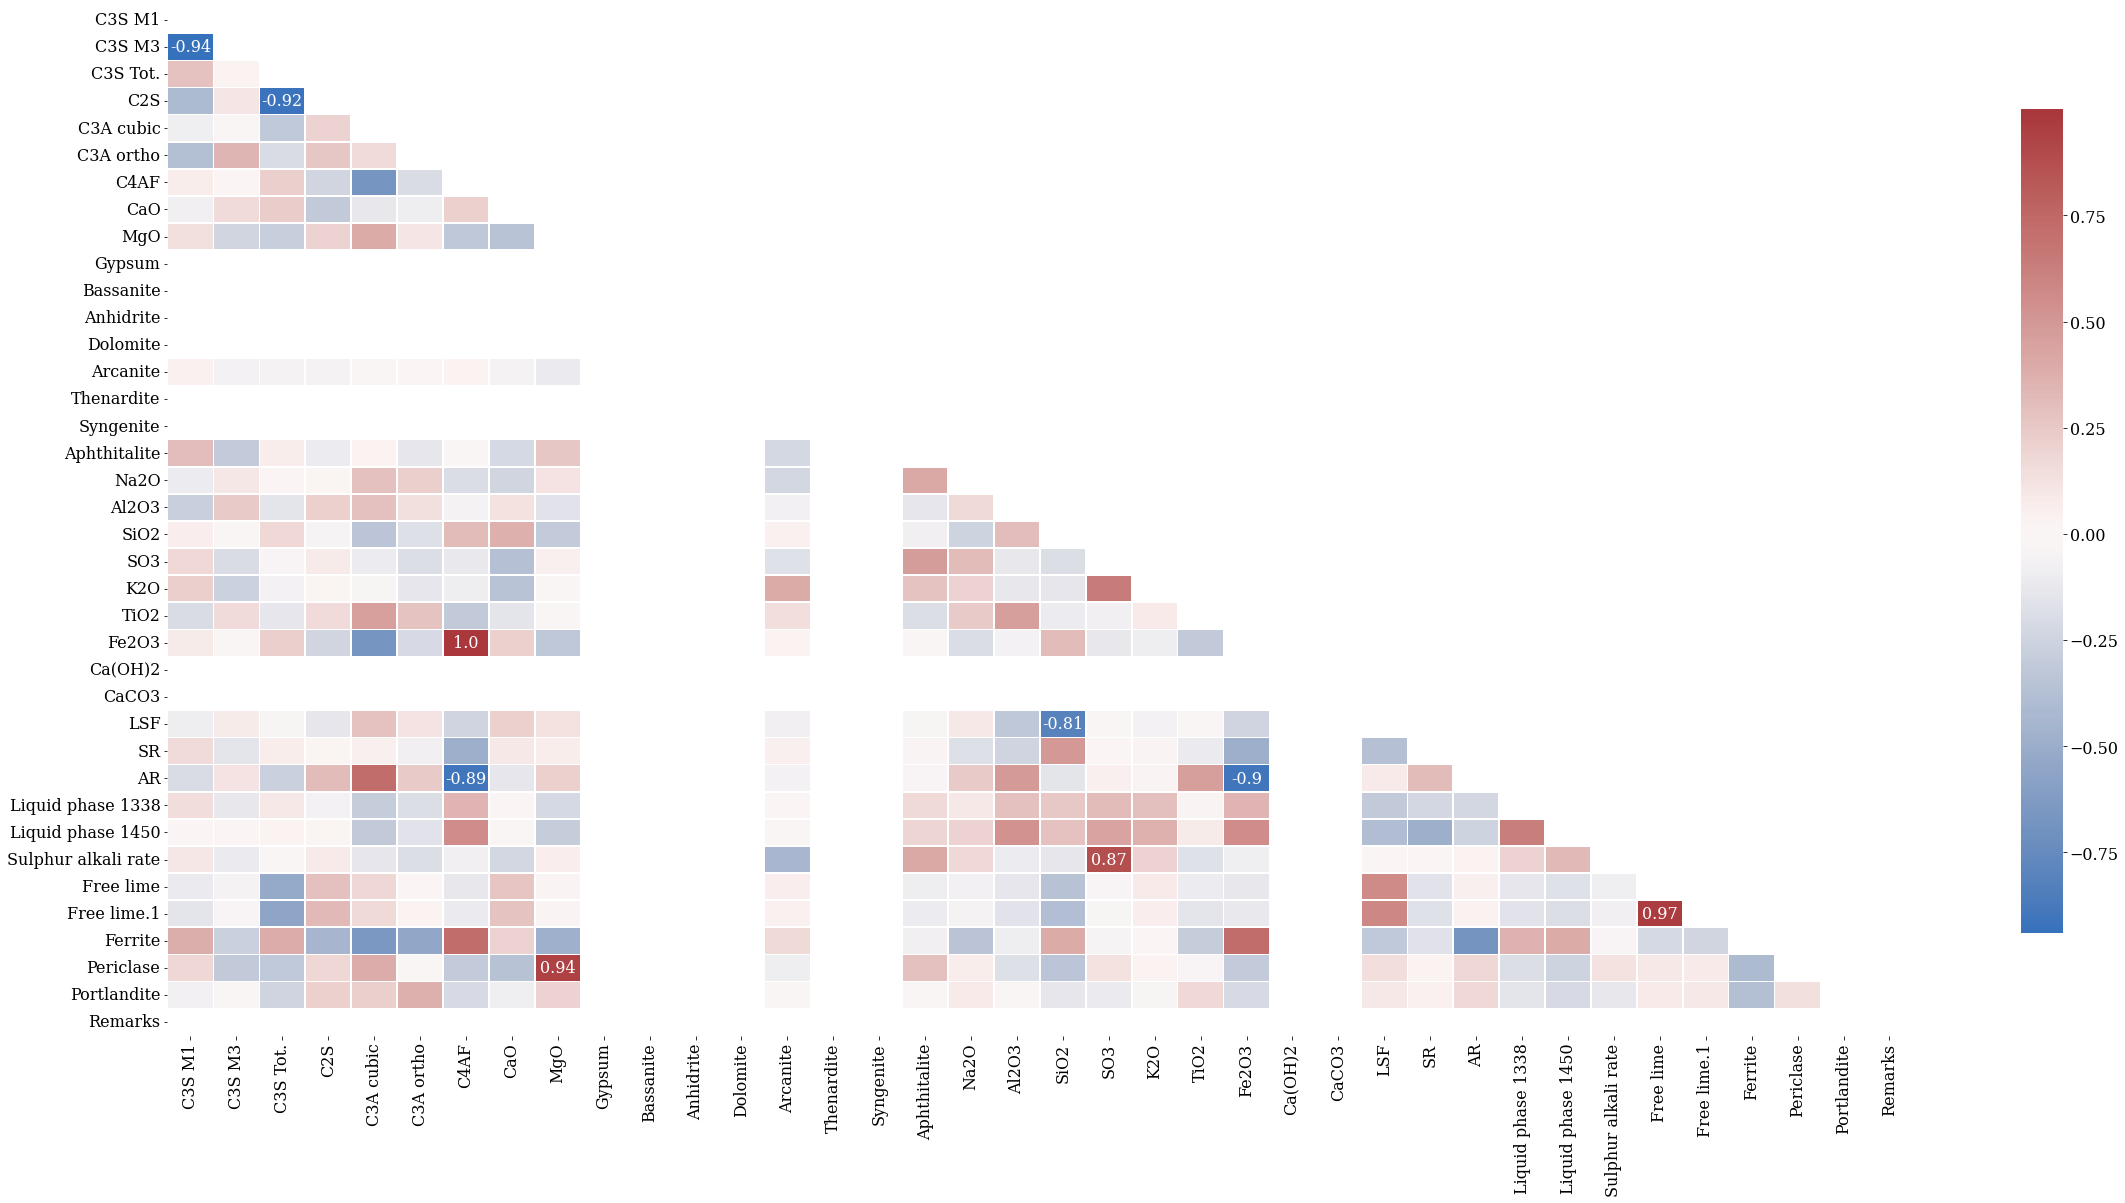

In [45]:
df_corr = df.corr(method="pearson")

labels = np.where(
    np.abs(df_corr) >= 0.75, np.round(df_corr[np.abs(df_corr) > 0.75], 2), ""
)

# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [46]:
corr_matrix = df.corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

C4AF       Fe2O3                  0.999669
Free lime  Free lime.1            0.968000
MgO        Periclase              0.939996
C3S M1     C3S M3                 0.938679
C3S Tot.   C2S                    0.919751
Fe2O3      AR                     0.895792
C4AF       AR                     0.894545
SO3        Sulphur alkali rate    0.871846
SiO2       LSF                    0.813836
C3A cubic  AR                     0.722245
C4AF       Ferrite                0.721259
Fe2O3      Ferrite                0.719613
dtype: float64

In [47]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

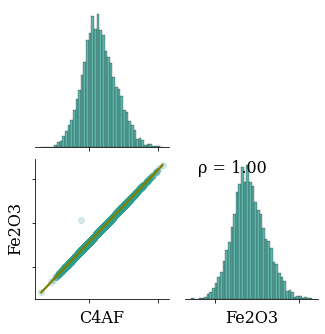

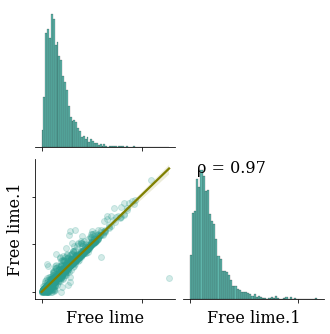

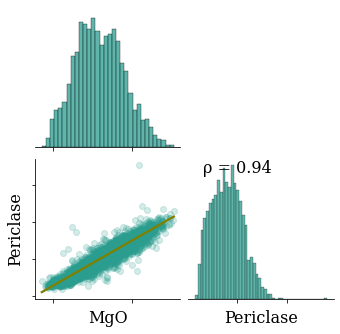

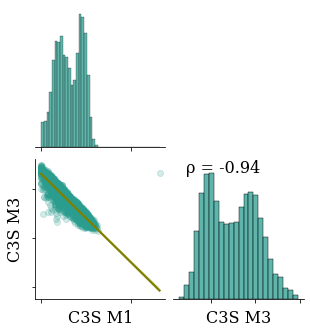

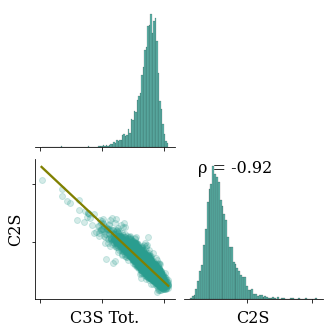

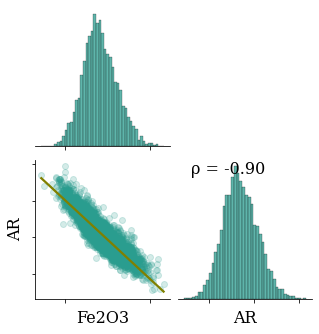

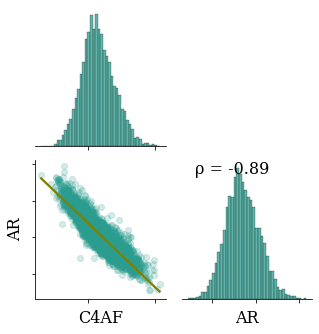

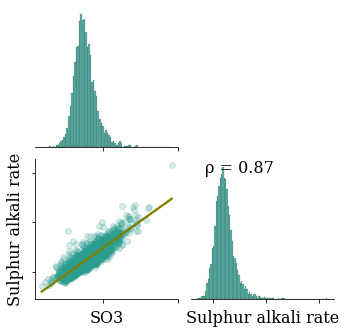

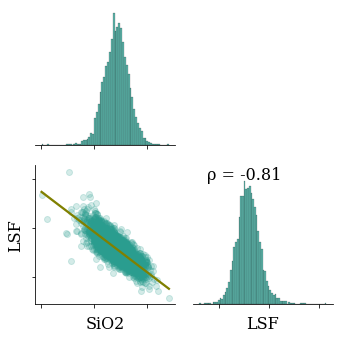

In [48]:
for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Data/Hora Variable Analyses

In [49]:
dates

0      2020-01-11 15:00:00
1      2020-01-11 17:00:00
2      2020-01-11 19:00:00
3      2020-01-11 21:00:00
4      2020-01-11 23:00:00
               ...        
5150   2022-05-03 05:00:00
5151   2022-05-03 09:00:00
5152   2022-05-03 13:00:00
5153   2022-05-03 17:00:00
5154   2022-05-03 21:00:00
Length: 5155, dtype: datetime64[ns]

In [50]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

459 valid days out of 643


In [51]:
# All years of data
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2020, 2021, 2022}


In [52]:
months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5}}

In [53]:
days_each_month_per_year = {}
for year in years:
    for month in months_each_year[year]:
        days_each_month_per_year[str(year) + '-' + str(month)] = [date.day for date in dates if date.year == year and date.month == month]

print("Days of available data for each month each year:")
days_each_month_per_year

Days of available data for each month each year:


{'2020-1': [11,
  11,
  11,
  11,
  11,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  23,
  23,
  23,
  23,
  23,
  23,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  25,
  25,
  25,
  25,
  25,
  25,
  25,
  25,
  25,
  26,
  26,
  26,
  26,
  26,
  26,
  26,
  26,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  29,
  29,
  29,
  29,


In [54]:
# count of days each month per year
count_of_days_each_month_per_year = {}

for year_month, days in days_each_month_per_year.items():
    count_of_days_each_month_per_year[year_month] = len(days)

print("Count of days each month per year:")
count_of_days_each_month_per_year

Count of days each month per year:


{'2020-1': 180,
 '2020-2': 135,
 '2020-3': 99,
 '2020-4': 198,
 '2020-5': 274,
 '2020-6': 53,
 '2020-7': 223,
 '2020-8': 225,
 '2020-9': 229,
 '2020-10': 341,
 '2020-11': 268,
 '2020-12': 130,
 '2021-1': 125,
 '2021-2': 39,
 '2021-3': 135,
 '2021-4': 161,
 '2021-5': 74,
 '2021-6': 128,
 '2021-7': 318,
 '2021-8': 323,
 '2021-9': 222,
 '2021-10': 330,
 '2021-11': 245,
 '2021-12': 231,
 '2022-1': 101,
 '2022-2': 115,
 '2022-3': 130,
 '2022-4': 107,
 '2022-5': 16}

In [55]:
max_obs_key = max(count_of_days_each_month_per_year, key=count_of_days_each_month_per_year.get)
max_obs_value = count_of_days_each_month_per_year[max_obs_key]
min_obs_key = min(count_of_days_each_month_per_year, key=count_of_days_each_month_per_year.get)
min_obs_value = count_of_days_each_month_per_year[min_obs_key]
print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2022-5 has the minimum number of days with samples - 16
2020-10 has the maximum number of days with samples - 341


In [56]:
mean_obs_per_year = {str(year) : 0 for year in years}

for year, value in count_of_days_each_month_per_year.items():
    mean_obs_per_year[year[:4]] += value

for year, value in months_each_year.items():
    mean_obs_per_year[str(year)] /= len(value)
    mean_obs_per_year[str(year)] = int(mean_obs_per_year[str(year)])
    
print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(np.mean(list(count_of_days_each_month_per_year.values()))))

Mean Number of observations - per year
{'2020': 196, '2021': 194, '2022': 93}

Mean number of observations - all years
177


In [57]:
# Here we get the frequency of the whole time series

diffs = []

for i in range(1, len(dates)):
    diffs.append(dates[i] - dates[i-1])
diffs

[Timedelta('0 days 02:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 04:00:00'),
 Timedelta('0 days 04:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 04:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 06:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 04:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 04:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedelta('0 days 02:00:00'),
 Timedel

In [58]:
# Average Frequency
np.mean(diffs)

Timedelta('0 days 03:55:35.972060535')

In [59]:
Counter(diffs)

Counter({Timedelta('0 days 02:00:00'): 3418,
         Timedelta('0 days 04:00:00'): 1444,
         Timedelta('0 days 06:00:00'): 60,
         Timedelta('0 days 08:00:00'): 76,
         Timedelta('0 days 14:00:00'): 2,
         Timedelta('3 days 00:00:00'): 1,
         Timedelta('0 days 16:00:00'): 10,
         Timedelta('0 days 01:00:00'): 21,
         Timedelta('0 days 23:00:00'): 1,
         Timedelta('9 days 02:00:00'): 1,
         Timedelta('0 days 10:00:00'): 16,
         Timedelta('1 days 00:00:00'): 5,
         Timedelta('0 days 12:00:00'): 15,
         Timedelta('0 days 03:00:00'): 21,
         Timedelta('1 days 12:00:00'): 3,
         Timedelta('24 days 13:00:00'): 1,
         Timedelta('0 days 05:00:00'): 5,
         Timedelta('0 days 22:00:00'): 3,
         Timedelta('0 days 18:00:00'): 6,
         Timedelta('33 days 08:00:00'): 1,
         Timedelta('6 days 17:00:00'): 1,
         Timedelta('0 days 20:00:00'): 8,
         Timedelta('9 days 16:00:00'): 1,
         Timedelta(

<AxesSubplot:xlabel='count'>

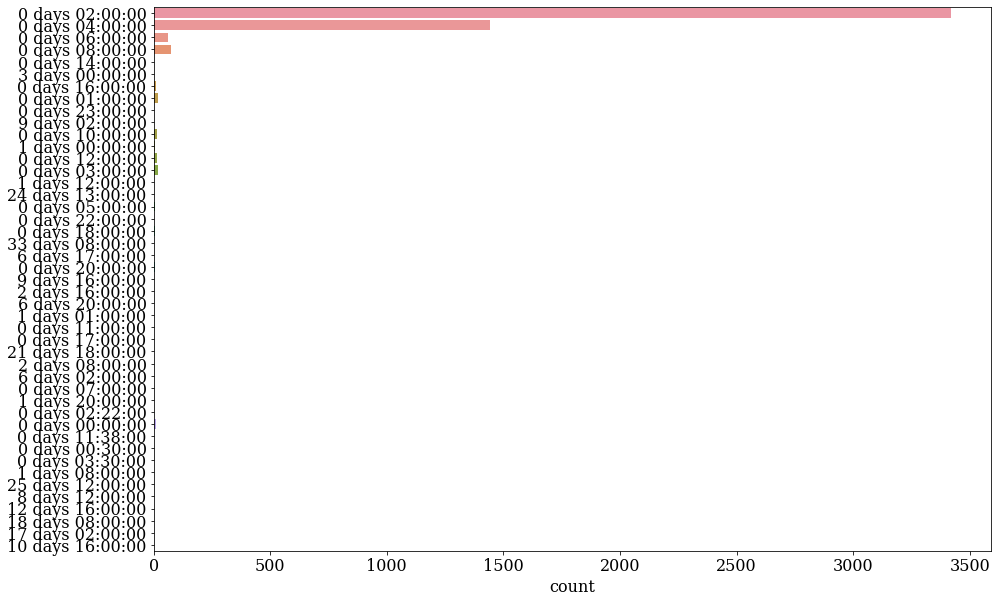

In [60]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y=diffs)

In [61]:
# Same thing but only with the dates

diffs = []

for i in range(1, len(dates)):
    diffs.append(dates[i].date() - dates[i-1].date())
diffs

[datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(1),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(1),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(1),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(1),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timede

In [62]:
# Average Frequency
np.mean(diffs)

datetime.timedelta(0, 14131, 781141)

In [63]:
Counter(diffs)

Counter({datetime.timedelta(0): 4512,
         datetime.timedelta(1): 624,
         datetime.timedelta(3): 2,
         datetime.timedelta(9): 2,
         datetime.timedelta(25): 1,
         datetime.timedelta(33): 1,
         datetime.timedelta(7): 1,
         datetime.timedelta(2): 2,
         datetime.timedelta(6): 2,
         datetime.timedelta(22): 1,
         datetime.timedelta(26): 1,
         datetime.timedelta(8): 1,
         datetime.timedelta(12): 1,
         datetime.timedelta(19): 1,
         datetime.timedelta(17): 1,
         datetime.timedelta(10): 1})

In [64]:
# percent of diffs
[round(val/df.shape[0] *100, 2) for val in list(Counter(diffs).values())]

[87.53,
 12.1,
 0.04,
 0.04,
 0.02,
 0.02,
 0.02,
 0.04,
 0.04,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02]

<AxesSubplot:xlabel='count'>

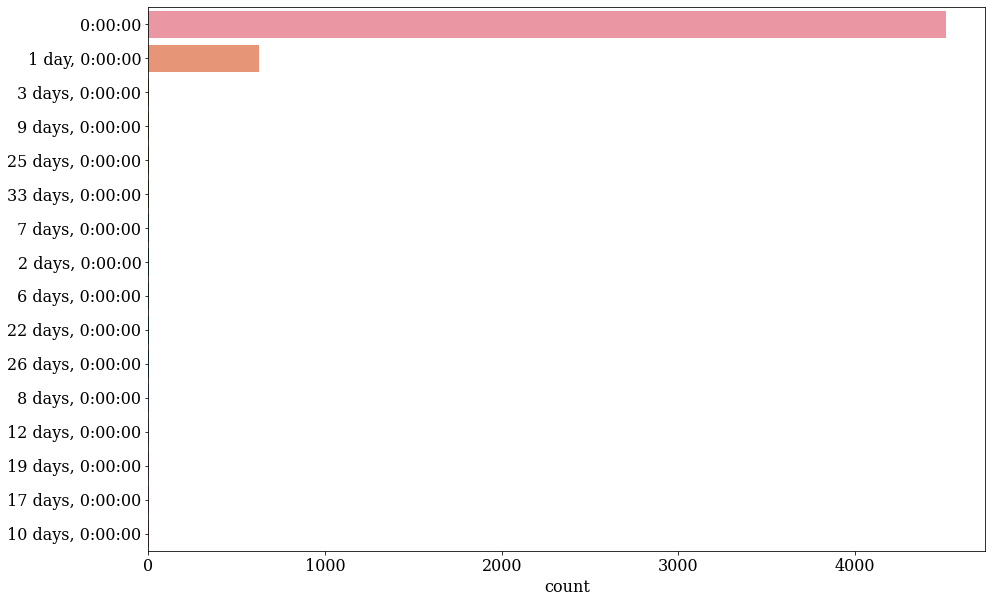

In [65]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y= diffs)

In [66]:
((df.isna().sum()/df.shape[0] * 100) >= 100).sort_values()

Production             False
Al2O3                  False
SiO2                   False
SO3                    False
K2O                    False
TiO2                   False
Fe2O3                  False
LSF                    False
Na2O                   False
SR                     False
Liquid phase 1338      False
Liquid phase 1450      False
Sulphur alkali rate    False
Free lime              False
Free lime.1            False
Ferrite                False
Periclase              False
AR                     False
Portlandite            False
Aphthitalite           False
C4AF                   False
Arcanite               False
Measurement            False
Production.1           False
Measurement.1          False
C3S M1                 False
MgO                    False
CaO                    False
C3S M3                 False
C3S Tot.               False
C2S                    False
C3A ortho              False
C3A cubic              False
Thenardite              True
CaCO3         